In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
import  tensorflow.keras.backend as k
from tensorflow.keras.utils import to_categorical,normalize,CustomObjectScope
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# We are building a sequential model
num_classes =  2
num_features = 784
model = Sequential()  
model.add(Dense(512, activation = 'relu', input_shape = (num_features,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 665,602
Trainable params: 665,602
Non-trainable params: 0
_________________________________________________________________


In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=num_features,random_state=0)

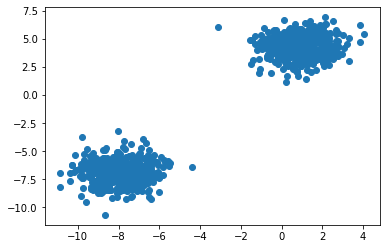

In [53]:
plt.scatter(X[:,0],X[:,1])

In [58]:
# A way of checking the backend of keras
k.backend()

'tensorflow'

In [59]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

In [61]:
from tensorflow.keras.utils import to_categorical

In [75]:
to_categorical(y)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [85]:
from tensorflow.keras.utils import plot_model 

In [104]:

# Simple model training


x_train = np.random.random((100,4)) 
y_train = np.random.random((100,1))


In [105]:
x_val = np.random.random((100,4)) 
y_val = np.random.random((100,1))

In [106]:
model = Sequential()

In [107]:
from tensorflow.keras.layers import LSTM, Dense 

# add a sequence of vectors of dimension 16 
model.add(LSTM(16, return_sequences = True)) 
model.add(Dense(10, activation = 'softmax'))

In [108]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [111]:
# model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_val, y_val))

In [110]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.33, random_state=4)

In [122]:
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [131]:
model = Sequential() 
model.add(Dense(512, activation = 'relu', input_shape = (784,))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(2, activation = 'softmax'))

In [132]:
from tensorflow.keras.optimizers import RMSprop 
model.compile(loss = 'categorical_crossentropy',     
   optimizer = RMSprop(), 
   metrics = ['accuracy'])

In [133]:
history = model.fit(
   x_train, y_train, 
   batch_size = 128, 
   epochs = 20, 
   verbose = 1, 
   validation_data = (x_test, y_test)
)

Epoch 1/20
6/6 [==============================] - 1s 64ms/step - loss: 0.0541 - accuracy: 0.9822 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
6/6 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

In [142]:
!```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````~~`~~~~~Z`conda install -c conda-forge ray-tune 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - ray-tune

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [139]:
from ray import tune


def objective(step, alpha, beta):
    return (0.1 + alpha * step / 100)**(-1) + beta * 0.1


def training_function(config):
    # Hyperparameters
    alpha, beta = config["alpha"], config["beta"]
    for step in range(10):
        # Iterative training function - can be any arbitrary training procedure.
        intermediate_score = objective(step, alpha, beta)
        # Feed the score back back to Tune.
        tune.report(mean_loss=intermediate_score)


analysis = tune.run(
    training_function,
    config={
        "alpha": tune.grid_search([0.001, 0.01, 0.1]),
        "beta": tune.choice([1, 2, 3])
    })

print("Best config: ", analysis.get_best_config(
    metric="mean_loss", mode="min"))

# Get a dataframe for analyzing trial results.
df = analysis.results_df

ModuleNotFoundError: No module named 'ray'